# Regresión Lineal Multiple

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


<a id="section4"></a>
#Normalización de caracteristicas


In [8]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = np.loadtxt('/content/gdrive/MyDrive/IA 1/datasets/StressLevelDataset_cleaned.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

1100
  X[:,0] X[:, 1]         y
--------------------------
      14      20         1
      15       8         2
      12      18         1
      16      12         2
      16      28         1
      20      13         2
       4      26         0
      17       3         2
      13      22         1
       6       8         1


In [10]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = np.loadtxt('/content/gdrive/MyDrive/IA 1/datasets/StressLevelDataset_cleaned.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]
m = y.size
print(m)
# Dynamically create format string for headers and data
header_format = '{:>8s}' * X.shape[1] + '{:>10s}'
data_format = '{:8.0f}' * X.shape[1] + '{:10.0f}'

headers = [f'X[:,{j}]' for j in range(X.shape[1])] + ['y']

print(header_format.format(*headers))
print('-' * (8 * X.shape[1] + 10))

for i in range(min(10, m)):
    print(data_format.format(*X[i, :], y[i]))

1100
  X[:,0]  X[:,1]  X[:,2]  X[:,3]  X[:,4]  X[:,5]  X[:,6]  X[:,7]  X[:,8]  X[:,9] X[:,10] X[:,11] X[:,12] X[:,13]         y
--------------------------------------------------------------------------------------------------------------------------
      14      20      11       2       2       2       3       3       3       2       3       3       2       2         1
      15       8      15       5       1       3       1       2       1       4       1       5       1       5         2
      12      18      14       2       2       2       2       3       2       3       3       2       2       2         1
      16      12      15       4       1       4       2       2       2       4       1       4       1       5         2
      16      28       7       2       5       3       2       4       4       3       1       2       1       5         1
      20      13      21       3       1       3       2       2       2       5       2       5       1       5         2
       4   

In [11]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [12]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[14. 20. 11. ...  3.  2.  2.]
 [15.  8. 15. ...  5.  1.  5.]
 [12. 18. 14. ...  2.  2.  2.]
 ...
 [ 4. 26.  3. ...  1.  3.  1.]
 [21.  0. 19. ...  4.  1.  4.]
 [18.  6. 15. ...  3.  1.  4.]]
Media calculada: [11.06363636 17.77727273 12.55545455  2.50818182  2.66        2.64909091
  2.51818182  2.73727273  2.77272727  2.62181818  2.64818182  2.64909091
  1.88181818  2.61727273]
Desviación estandar calculada: [6.11477685 8.94053241 7.72349528 1.4087152  1.54767861 1.32752302
 1.11869907 1.40553187 1.41395056 1.3151828  1.38394901 1.52868009
 1.04735006 1.53026196]
[[ 0.48020782  0.24861241 -0.20139257 ...  0.22955038  0.11283889
  -0.40337716]
 [ 0.64374608 -1.09358954  0.31650766 ...  1.53786859 -0.84195172
   1.5570715 ]
 [ 0.15313129  0.02491208  0.18703261 ... -0.42460873  0.11283889
  -0.40337716]
 ...
 [-1.15517484  0.91971338 -1.23719303 ... -1.07876784  1.0676295
  -1.05686005]
 [ 1.62497568 -1.98839084  0.8344079  ...  0.88370948 -0.84195172
   0.90358861]
 [ 1.13436088 -1.3172

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [13]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [14]:
print(X)

[[ 1.          0.48020782  0.24861241 ...  0.22955038  0.11283889
  -0.40337716]
 [ 1.          0.64374608 -1.09358954 ...  1.53786859 -0.84195172
   1.5570715 ]
 [ 1.          0.15313129  0.02491208 ... -0.42460873  0.11283889
  -0.40337716]
 ...
 [ 1.         -1.15517484  0.91971338 ... -1.07876784  1.0676295
  -1.05686005]
 [ 1.          1.62497568 -1.98839084 ...  0.88370948 -0.84195172
   0.90358861]
 [ 1.          1.13436088 -1.31728986 ...  0.22955038 -0.84195172
   0.90358861]]


<a id="section5"></a>
#Descenso por el gradiente
La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
- (x^{(1)})^T - \\
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\ \\
\end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`.
</div>

<a id="computeCostMulti"></a>

In [15]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [16]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [ 0.97815109  0.0469205  -0.11250177  0.05774437  0.09075429 -0.08827758
  0.09974391 -0.01883636 -0.07550873 -0.09183275  0.06560851  0.01228978
  0.04996477 -0.01824924  0.09742954]


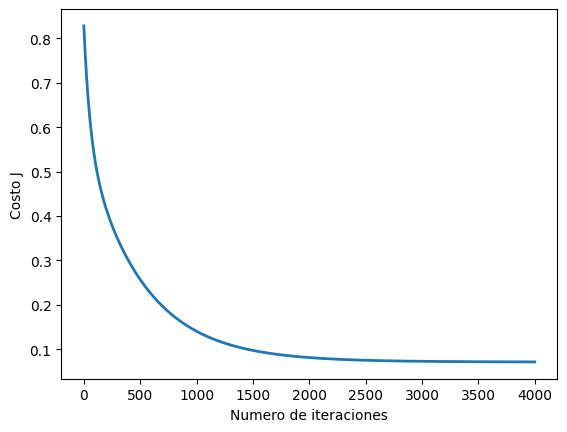

In [18]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1]) # Initialize theta with the number of features in X
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
# X_array = [1, 1650, 3] # This part is commented out as it uses a specific example not relevant to the current dataset
# X_array[1:3] = (X_array[1:3] - mu) / sigma # This part is commented out as it uses a specific example not relevant to the current dataset
# price = np.dot(X_array, theta)   # Se debe cambiar esto # This part is commented out as it uses a specific example not relevant to the current dataset

# print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price)) # This part is commented out as it uses a specific example not relevant to the current dataset

In [21]:
# Create a new data point with the same number of features as the training data (excluding the intercept)
new_data_point = np.array([12, 15, 10, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2]) # Example data point

# Add the intercept term to the new data point
X_array = np.concatenate([[1], new_data_point])

# Normalize the new data point using the calculated mu and sigma
X_array[1:] = (X_array[1:] - mu) / sigma

print("Normalized X_array:", X_array)

# Now you can use this X_array to predict the price using the calculated theta
# price = np.dot(X_array, theta)
# print('El precio predecido para una casa de 1222 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

Normalized X_array: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('Predicted value (using gradient descent): {:.0f}'.format(price))

Predicted value (using gradient descent): 1


# Ecuacion de la Normal

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$).

In [24]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/IA 1/datasets/StressLevelDataset_cleaned.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]
m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

1100


In [25]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [29]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

# Create an example data point with the correct number of features (14) plus intercept (1)
X_array = np.array([1, 12, 15, 10, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2]) # Example data point with 14 features + intercept

price = np.dot(X_array, theta)

print('Valor predicho (usando la ecuación normal): {:.0f}'.format(price))

# Interpretation of the result
print('\nInterpretación: El nivel de estrés predicho para una persona con las características dadas es aproximadamente {:.0f}.'.format(price))
print('Nota: El nivel de estrés es un valor discreto (0, 1 o 2) basado en el conjunto de datos original,')
print('por lo que el valor predicho debe interpretarse como el nivel de estrés entero más cercano.')

Theta calculado a partir de la ecuación de la normal: [ 0.85306628  0.00552173 -0.01521394  0.00699129  0.07176586 -0.06021529
  0.07813065 -0.01222298 -0.05918506 -0.06973954  0.04720463  0.02614543
  0.02318896 -0.01072571  0.07259258]
Valor predicho (usando la ecuación normal): 1

Interpretación: El nivel de estrés predicho para una persona con las características dadas es aproximadamente 1.
Nota: El nivel de estrés es un valor discreto (0, 1 o 2) basado en el conjunto de datos original,
por lo que el valor predicho debe interpretarse como el nivel de estrés entero más cercano.
